In [523]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [524]:
madden_df = pd.read_csv('data2023/actualmaddenratings.csv')
madden_df.head()

,#,Team,Position,Archetype,Jersey #,Unnamed: 5,Last Name,Age,Height,Weight,...,Years Pro,Handedness,College,Portrait ID,Team ID,Primary Key,Full Name,Player Asset,Iteration,Status
0,1,Packers,WR,WR_RouteRunner,17,Davante,Adams,28,73,215,...,7,Right,Fresno State,6328,20,10823,Davante Adams,AdamsDavante_10823,launch-ratings,published
1,2,Chiefs,QB,QB_Improviser,15,Patrick,Mahomes,25,75,230,...,4,Right,Texas Tech,8648,9,12635,Patrick Mahomes,MahomesIIPatrick_12635,launch-ratings,published
2,3,Chiefs,TE,TE_VerticalThreat,87,Travis,Kelce,31,77,260,...,8,Right,Cincinnati,5920,9,890,Travis Kelce,KelceTravis_890,launch-ratings,published
3,4,Rams,RE,DE_PowerRusher,99,Aaron,Donald,30,73,280,...,7,Right,Pittsburgh,6394,24,10852,Aaron Donald,DonaldAaron_10852,launch-ratings,published
4,5,Rams,CB,CB_MantoMan,5,Jalen,Ramsey,26,73,208,...,5,Right,Florida State,8185,24,17538,Jalen Ramsey,RamseyJalen_17538,launch-ratings,published


In [525]:
madden_df.columns

Index(['#', 'Team', 'Position', 'Archetype', 'Jersey #', 'Unnamed: 5',
       'Last Name', 'Age', 'Height', 'Weight', 'Overall', 'Speed',
       'Acceleration', 'Agility', 'Change of Dir', 'Strength', 'Jumping',
       'Awareness', 'Carrying', 'Break Tackle', 'Juke Move', 'Spin Move',
       'Trucking', 'Stiff Arm', 'BC Vision', 'Catching', 'Catch In Traffic',
       'Spec Catch', 'Release', 'Short RR', 'Medium RR', 'Deep RR',
       'Throw Power', 'Throw Acc Short', 'Throw Acc Mid', 'Throw Acc Deep',
       'Throw Under Pressure', 'Throw On The Run', 'Play Action', 'Break Sack',
       'Run Block', 'Run Block Power', 'Run Block Finesse', 'Pass Block',
       'Pass Block Power', 'Pass Block Finesse', 'Impact Blocking',
       'Lead Blocking', 'Tackle', 'Hit Power', 'Pursuit', 'Man Coverage',
       'Zone Coverage', 'Press', 'Play Recognition', 'Power Moves',
       'Finesse Moves', 'Block Shedding', 'Kick Power', 'Kick Accuracy',
       'Kick Return', 'Stamina', 'Injury', 'Toughness', 

### Keeping non-categorical columns that make sense

In [526]:
feature_columns = ['Position', 'Age', 'Height', 'Weight', 'Overall', 'Speed',
 'Acceleration', 'Agility', 'Change of Dir', 'Strength', 'Jumping',
 'Awareness', 'Carrying', 'Break Tackle', 'Juke Move', 'Spin Move',
 'Trucking', 'Stiff Arm', 'BC Vision', 'Catching', 'Catch In Traffic',
 'Spec Catch', 'Release', 'Short RR', 'Medium RR', 'Deep RR',
 'Throw Power', 'Throw Acc Short', 'Throw Acc Mid', 'Throw Acc Deep',
 'Throw Under Pressure', 'Throw On The Run', 'Play Action', 'Break Sack',
 'Run Block', 'Run Block Power', 'Run Block Finesse', 'Pass Block',
 'Pass Block Power', 'Pass Block Finesse', 'Impact Blocking',
 'Lead Blocking', 'Tackle', 'Hit Power', 'Pursuit', 'Man Coverage',
 'Zone Coverage', 'Press', 'Play Recognition', 'Power Moves',
 'Finesse Moves', 'Block Shedding', 'Kick Power', 'Kick Accuracy',
 'Kick Return', 'Stamina', 'Injury', 'Toughness', 'Years Pro']

feature_df = madden_df.drop(madden_df.columns.difference(feature_columns), axis='columns')
feature_df

,Position,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
0,WR,28,73,215,99,91,92,92,92,63,...,10,10,52,25,30,45,96,93,88,7
1,QB,25,75,230,99,81,87,88,87,70,...,10,10,24,20,10,10,96,95,96,4
2,TE,31,77,260,99,86,89,86,75,79,...,20,20,40,35,32,6,97,89,91,8
3,RE,30,73,280,99,82,90,86,68,99,...,99,97,97,25,21,10,87,98,93,7
4,CB,26,73,208,99,92,94,91,92,71,...,35,41,50,18,17,80,91,86,86,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,RE,26,74,296,59,73,81,56,52,84,...,60,68,60,17,14,9,72,81,83,3
2076,TE,24,76,257,59,74,84,74,68,76,...,10,10,32,15,12,30,81,87,79,1
2077,FS,25,73,188,58,86,90,90,89,55,...,33,42,48,15,11,53,89,83,77,3
2078,CB,22,70,203,58,88,87,85,80,64,...,39,46,48,10,11,50,88,84,79,0


In [527]:
position = feature_df['Position'].unique()[0]
positions = feature_df['Position'].unique()
positions


array(['WR', 'QB', 'TE', 'RE', 'CB', 'RG', 'HB', 'LOLB', 'LT', 'LG', 'SS',
       'LE', 'DT', 'MLB', 'C', 'FS', 'RT', 'K', 'FB', 'P', 'ROLB'],
      dtype=object)

In [528]:
players_df = feature_df.loc[feature_df['Position'] == position]
players_df

,Position,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
0,WR,28,73,215,99,91,92,92,92,63,...,10,10,52,25,30,45,96,93,88,7
5,WR,29,73,212,98,90,90,92,88,78,...,30,32,45,20,20,72,98,97,97,8
8,WR,27,69,185,98,99,99,98,99,64,...,10,10,21,13,15,92,91,88,93,5
9,WR,27,72,191,97,92,94,93,96,62,...,10,10,35,30,30,85,86,87,87,6
24,WR,32,75,220,95,92,90,93,90,78,...,10,10,45,25,15,68,98,86,95,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,WR,23,71,188,62,86,88,79,78,56,...,10,10,28,14,15,77,82,86,80,1
1985,WR,26,73,186,62,93,91,86,81,68,...,55,40,47,18,17,61,87,81,74,3
1988,WR,23,71,187,62,85,87,79,80,60,...,10,10,30,17,15,78,83,87,79,1
2031,WR,21,74,200,61,83,87,81,79,62,...,10,10,24,20,14,70,84,89,84,0


### Fitting to 6 components explains about 70% of the variance

In [529]:
pca = PCA(n_components=6)
pca.fit(players_df.drop(['Position'], axis='columns'))

PCA(n_components=6)

Text(0, 0.5, 'Cumulative explained variance')

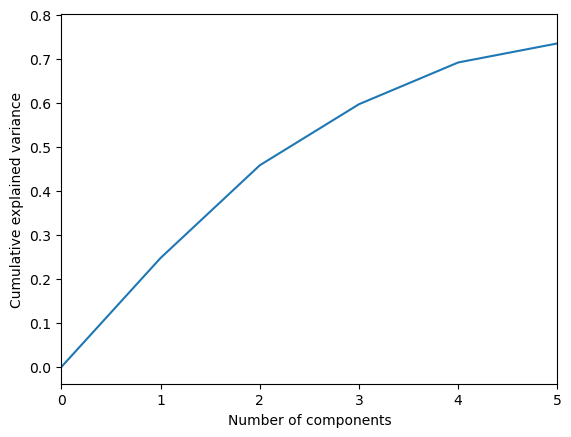

In [530]:
plt.plot(np.r_[[0],np.cumsum(pca.explained_variance_ratio_)])
plt.xlim(0, pca.n_components_ - 1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [531]:
components = pd.DataFrame(pca.components_, columns = players_df.drop(['Position'], axis='columns').columns, index=range(1, pca.n_components_ + 1))
components

,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,Jumping,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
1,0.010903,-0.005107,0.012268,0.079682,-0.000963,0.005741,0.034597,0.028479,0.043501,0.022215,...,0.020815,0.019131,0.077683,0.092698,0.071703,0.102503,0.040568,0.005982,0.035665,0.014693
2,-0.003763,-0.057456,-0.438325,-0.112299,0.021858,0.019155,0.034133,0.061457,-0.231779,-0.068453,...,-0.013488,-0.007327,-0.107244,-0.008476,-0.003785,0.319514,-0.050530,-0.027677,-0.104595,-0.008792
3,-0.044065,0.035528,0.227413,-0.294783,-0.049903,-0.037154,-0.110362,-0.131202,0.039427,-0.060249,...,0.049966,0.050832,0.080799,-0.063658,-0.068461,-0.313579,-0.084376,-0.016800,-0.042157,-0.056084
4,0.015689,-0.027760,-0.127457,0.022776,0.023832,0.005796,0.028887,0.034692,-0.026659,0.012609,...,0.164806,0.207437,0.253878,0.012989,0.018628,0.317345,0.024233,-0.003207,-0.003816,0.016468
5,0.003254,0.009276,-0.207423,0.128841,0.025837,0.019763,0.019935,0.055635,-0.086550,0.008824,...,0.046336,0.031154,0.048965,-0.024287,-0.006993,-0.784006,0.020012,-0.004589,0.019027,0.003878
6,0.098765,0.020162,0.044854,-0.035487,-0.040716,-0.023599,-0.025016,-0.071054,-0.065200,-0.034715,...,-0.023474,-0.050401,0.213481,0.371486,0.407696,-0.057686,-0.011896,-0.067416,-0.134933,0.092276


### Takes the index of the component with the largest absolute 'Overall' value

In [532]:
print(components['Overall'])
component_index = components['Overall'].abs().argmax() + 1
component_index

1    0.079682
2   -0.112299
3   -0.294783
4    0.022776
5    0.128841
6   -0.035487
Name: Overall, dtype: float64


3

### Print out the columns that correlate positively/negatively with positive/negative 'Overall' value

In [533]:
if components['Overall'][component_index] >= 0: 
    print('Positive influence:')
    print(components.loc[component_index].sort_values(ascending=False).head(10))
    print('Negative influence:')
    print(components.loc[component_index].sort_values(ascending=True).head(10))
elif components['Overall'][component_index] < 0: 
    print('Positive influence:')
    print(components.loc[component_index].sort_values(ascending=True).head(10))
    print('Negative influence:')
    print(components.loc[component_index].sort_values(ascending=False).head(10))

Positive influence:
Awareness     -0.375588
Kick Return   -0.313579
Overall       -0.294783
Medium RR     -0.264190
Deep RR       -0.263238
Short RR      -0.248063
Release       -0.220448
Juke Move     -0.191630
BC Vision     -0.184976
Spin Move     -0.169004
Name: 3, dtype: float64
Negative influence:
Weight              0.227413
Hit Power           0.198747
Play Action         0.116997
Tackle              0.115075
Throw On The Run    0.099424
Pursuit             0.091772
Block Shedding      0.080799
Throw Acc Deep      0.077867
Man Coverage        0.075514
Press               0.072900
Name: 3, dtype: float64


In [534]:
k_best = SelectKBest(mutual_info_regression).fit(players_df.drop(['Position', 'Overall'], axis='columns'), players_df['Overall'])
k_best.get_feature_names_out()

array(['Awareness', 'Break Tackle', 'BC Vision', 'Catching',
       'Catch In Traffic', 'Spec Catch', 'Release', 'Short RR',
       'Medium RR', 'Deep RR'], dtype=object)